In [ ]:
#KEEP THIS JN AS BEST WORKING EXAMPLE WITH 30K RECORDS
#AMD
#AFINN Sentiment Analysis of Yelp review text
#Currently using a subset of 30K records - business_and_review_subsample30K.csv
#https://github.com/fnielsen/afinn/tree/master/afinn/data
#Use AFINN 165 with 3382 entries (compared to AFINN-111 with 2477 entries)
#http://darenr.github.io/afinn/ for browser based AFINN SA

#Compare to Afinn module Wsubset - row 3 has the same sentence as row 2 repeated. Normalization reduces the difference
#in score between the two, but the difference is still relatively high. Calculating the mean in this case would
#be better, but may not be beneficial for other case scenarios. Stick with sum/sqr(N) for normalization?
#Or try calculating mean as well?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import re
import sys
# import importlib

In [2]:
Yelp_subsample= pd.read_csv('business_and_review_subsample30K.csv')

In [8]:
Yelp_subsample.head()
Yelp_subsample=Yelp_subsample.sample(n=30000)
# Yelp_subsample.count()
Yelp_subsample

,business_id,text,sum_score,norm_score
29980,_QvGAqMmrUIlxpby2Ul5Dg,I am a fan of Mexican food and I love Chavelas...,15,5.303301
14544,frCxZS7lPhEnQRJ3UY6m7A,Excellent stop for tacos and salsa's. Food is ...,8,3.023716
3024,Uy3_5nLo3sYkAuSX6mjdmg,Best breakfast sammy in Vegas. The service is...,23,6.639528
13759,EC7NrIHKk6i3US_XJlDWDA,How is it that I am the first to review this p...,15,4.743416
9754,#NAME?,The apple bun with caramel was amazing! Staff...,8,4.618802
22352,j4jsgp-e315s11ehJfRzAA,Excellent food served excellently. The decor i...,10,4.082483
10079,sUMi2q41l4AzOsmJMRY8zQ,"It's not a destination, but if you're here, an...",14,4.666667
25880,z1jWE9gO4ehWJESM_H7zpA,Why is everyone raving about this place? I fee...,3,1.060660
1961,veXxt8rGY_RJPpA5QkHT9Q,Barrio has the best tacos and margaritas that ...,15,6.708204
16741,l0WauZ92kRg9bu2oxHj4TQ,Best pizza ever!!!! What an amazing find. The...,10,5.773503


In [9]:
def get_afinn_scores(file="AFINN/AFINN-en-165.txt" or "AFINN/AFINN-emoticon-8.txt"): 
#def get_afinn_scores(file="AFINN/AFINN-emoticon-8.txt"): 
    afinn_file = open(file)
    scores = {}
    for line in afinn_file:
      term, score  = line.split("\t")
      scores[term] = int(score)
    return(scores)

In [10]:
import nltk
afinn_scores = get_afinn_scores()
yelp_text = Yelp_subsample['text']

total =[]
score =[]
for word in yelp_text:
  #Tokenize the tweet
    words = nltk.word_tokenize(word)
  ## Get the total AFFIN score
    total_score = 0
    N = 0
    for w in words:
        if w.lower() in afinn_scores:
          total_score += afinn_scores[w.lower()]
          N += 1
#           print(total_score)
#     print('---')
    total.append(total_score)
    try:
        normalized_sentiment = (total_score/math.sqrt(N)) # based on # sentiment = float(sum(sentiments))/math.sqrt(len(sentiments))
    except ZeroDivisionError:
        normalized_sentiment = 0
    score.append(normalized_sentiment)
# se = pd.Series(score)
# Yelp_subsample['score']= se.values
# print(score)
#     print (total_score)
#     print(N)
#     print ('---')
#     print(normalized_sentiment)

  # Store the value
Yelp_subsample['sum_score'] = total
Yelp_subsample['norm_score'] = score

In [11]:
Yelp_subsample

,business_id,text,sum_score,norm_score
29980,_QvGAqMmrUIlxpby2Ul5Dg,I am a fan of Mexican food and I love Chavelas...,15,5.303301
14544,frCxZS7lPhEnQRJ3UY6m7A,Excellent stop for tacos and salsa's. Food is ...,8,3.023716
3024,Uy3_5nLo3sYkAuSX6mjdmg,Best breakfast sammy in Vegas. The service is...,23,6.639528
13759,EC7NrIHKk6i3US_XJlDWDA,How is it that I am the first to review this p...,15,4.743416
9754,#NAME?,The apple bun with caramel was amazing! Staff...,8,4.618802
22352,j4jsgp-e315s11ehJfRzAA,Excellent food served excellently. The decor i...,10,4.082483
10079,sUMi2q41l4AzOsmJMRY8zQ,"It's not a destination, but if you're here, an...",14,4.666667
25880,z1jWE9gO4ehWJESM_H7zpA,Why is everyone raving about this place? I fee...,3,1.060660
1961,veXxt8rGY_RJPpA5QkHT9Q,Barrio has the best tacos and margaritas that ...,15,6.708204
16741,l0WauZ92kRg9bu2oxHj4TQ,Best pizza ever!!!! What an amazing find. The...,10,5.773503


In [12]:
Yelp_subsample.describe()

,sum_score,norm_score
count,30000.000000,30000.000000
mean,10.303600,3.622042
std,11.256316,3.082444
min,-61.000000,-12.093836
25%,3.000000,1.809068
50%,9.000000,4.041452
75%,15.000000,5.715476
max,114.000000,16.664762


<function matplotlib.pyplot.colorbar>

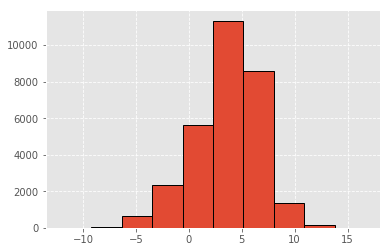

In [13]:
#Visualize distribution of norm_score
plt.style.use('ggplot')
plt.hist(Yelp_subsample['norm_score'], edgecolor='black', linewidth=1)
plt.grid(True, ls = 'dashed')
plt.colorbar

In [14]:
#Subdivide norm_scores into 5 bins
print(Yelp_subsample['norm_score'].quantile([0.2, 0.4, 0.6,0.8, 1]))

0.2     1.069045
0.4     3.333333
0.6     4.618802
0.8     6.047432
1.0    16.664762
Name: norm_score, dtype: float64


In [15]:
#Split data into 5 bins based on normalized score
bins = [-12.2, 1.07, 3.33, 4.62, 6.05, 16.67]
bin_stars = [1,2,3,4,5]
pd.cut(Yelp_subsample['norm_score'], bins, labels = bin_stars)
Yelp_subsample['bin_stars'] = pd.cut(Yelp_subsample['norm_score'], bins, labels=bin_stars)
Yelp_new_rating=Yelp_subsample
Yelp_new_rating.head()

,business_id,text,sum_score,norm_score,bin_stars
29980,_QvGAqMmrUIlxpby2Ul5Dg,I am a fan of Mexican food and I love Chavelas...,15,5.303301,4
14544,frCxZS7lPhEnQRJ3UY6m7A,Excellent stop for tacos and salsa's. Food is ...,8,3.023716,2
3024,Uy3_5nLo3sYkAuSX6mjdmg,Best breakfast sammy in Vegas. The service is...,23,6.639528,5
13759,EC7NrIHKk6i3US_XJlDWDA,How is it that I am the first to review this p...,15,4.743416,4
9754,#NAME?,The apple bun with caramel was amazing! Staff...,8,4.618802,3


In [16]:
Yelp_new_rating.dtypes

business_id      object
text             object
sum_score         int64
norm_score      float64
bin_stars      category
dtype: object

In [17]:
#Converting categories in bin_stars into integers in set_stars so that new bins can be plotted
#Delete extra columns
#Not sure why conversion to integers started at 0 so I added +1
Yelp_new_rating['set_stars']= pd.Categorical(Yelp_new_rating.bin_stars).codes + 1
Yelp_new_rating.head()

,business_id,text,sum_score,norm_score,bin_stars,set_stars
29980,_QvGAqMmrUIlxpby2Ul5Dg,I am a fan of Mexican food and I love Chavelas...,15,5.303301,4,4
14544,frCxZS7lPhEnQRJ3UY6m7A,Excellent stop for tacos and salsa's. Food is ...,8,3.023716,2,2
3024,Uy3_5nLo3sYkAuSX6mjdmg,Best breakfast sammy in Vegas. The service is...,23,6.639528,5,5
13759,EC7NrIHKk6i3US_XJlDWDA,How is it that I am the first to review this p...,15,4.743416,4,4
9754,#NAME?,The apple bun with caramel was amazing! Staff...,8,4.618802,3,3


In [18]:
Yelp_new_rating.describe()

,sum_score,norm_score,set_stars
count,30000.000000,30000.000000,30000.000000
mean,10.303600,3.622042,2.993533
std,11.256316,3.082444,1.407915
min,-61.000000,-12.093836,1.000000
25%,3.000000,1.809068,2.000000
50%,9.000000,4.041452,3.000000
75%,15.000000,5.715476,4.000000
max,114.000000,16.664762,5.000000


(0, 6)

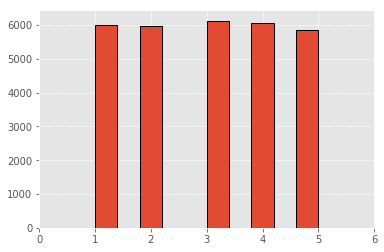

In [19]:
#Visualize distribution of norm_score
plt.style.use('ggplot')
plt.hist(Yelp_new_rating['set_stars'], edgecolor='black', linewidth=1)
plt.grid(True, ls = 'dashed')
plt.colorbar
plt.xlim(0,6)

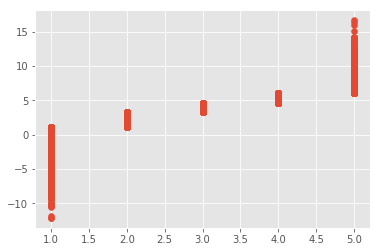

In [20]:
#Scatterplot set_stars vs. norm_score
plt.scatter(Yelp_new_rating['set_stars'], Yelp_new_rating['norm_score'])

In [ ]:
#Split data into training and testing set
#Run models